# Data Anaysis Hackathon Portion 

##### Plus Visualizations with matplotlib



Setting up for the experiment:

In [184]:
import matplotlib.pyplot as plt
import seaborn
import csv
import numpy as np
from numpy.polynomial.polynomial import polyfit
from scipy.stats import zscore

%matplotlib inline

LANGUAGES = ['chinese','japanese','french','german','italian','korean','portuguese','russian','spanish','thai']

In [185]:
# dataDirectory = './kld/'

# Use the following directory 
# for entropy data calculated using individual characters (only for chinese/japanese/korean/thai)

dataDirectory = './data/kld/'

In [186]:

# Function that returns a (tuple) of [arrays] of summary stats
def getStats(language): 
    origE = []
    transE = []
    changeInE = []
    englishRatings = []
    originalRatings = []
    changeInR = []

    with open(dataDirectory + language + '-entropy.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                # For 'none' vals in conversions
                try: 
                    origE.append(float(row[11]))
                    transE.append(float(row[12]))
                    changeInE.append(float(row[12]) - float(row[11]))
                except: 
                    pass
                # For unclean rating vals (''+12+12')
                try: 
                    englishRatings.append(float(row[3]))
                    originalRatings.append(float(row[7]))
                    changeInR.append(float(row[3]) - float(row[7]))
                    
                except: 
                    pass

    return origE, transE, changeInE, englishRatings, originalRatings, changeInR



def average(list):
    if len(list) == 0: return 0
    return sum(list) / len(list)

                                       [0]      [1]       [2]        [3]            [4]   [5]
#### Get a data dictionary: {language => ( original Entropy, translated E, changeInE, englishRatings, originalRatings, changeInR )}

In [187]:
languageStats = {}

for lang in LANGUAGES:
    languageStats[lang] = (getStats(lang))
    

### Avergage Change in Entropy __VS__ Language 

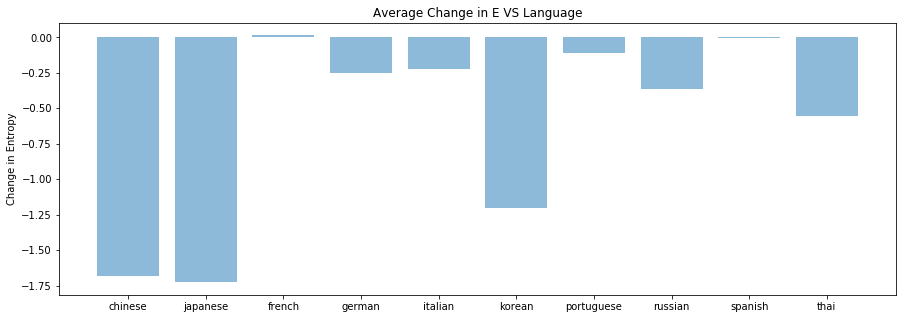

In [188]:
plt.figure(figsize=(15,5))

# kld VS. kudos 

x_pos = np.arange(len(LANGUAGES)) # Set label locations
averageChangeInE = [average(languageStats[lang][2]) for lang in languageStats]

plt.bar(x_pos, averageChangeInE, align='center', alpha=0.5)
# plt.bar(y_pos, averageChangeInE, align='center', alpha=0.5)
plt.xticks(x_pos, LANGUAGES)
plt.ylabel('Change in Entropy')
plt.title('Average Change in E VS Language')

plt.show()

### Avergage Post Rating __VS__ Language 

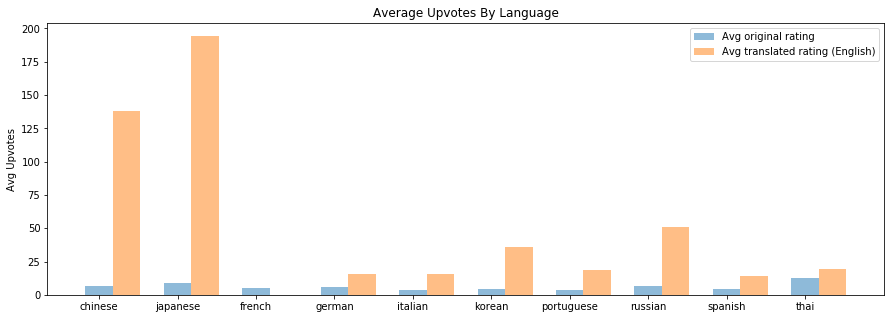

In [189]:
plt.figure(figsize=(15,5))


x_pos = np.arange(len(LANGUAGES)) # Set label locations
averageOriginalKudos = [average(languageStats[lang][3]) for lang in languageStats]
averageTranslatedKudos = [average(languageStats[lang][4]) for lang in languageStats]
width = 0.35  # Bar width 

plt.bar(x_pos, averageOriginalKudos, width, align='center', alpha=0.5, label='Avg original rating')
plt.bar(x_pos+.35, averageTranslatedKudos, width, align='center', alpha=0.5, label='Avg translated rating (English)')
# plt.bar(y_pos, averageChangeInE, align='center', alpha=0.5)
plt.xticks(x_pos, LANGUAGES)
plt.ylabel('Avg Upvotes')
plt.title('Average Upvotes By Language')

plt.legend()

plt.show()


Issues: 
    * Scraping: upvote fields for "french" are badly formatted 

No handles with labels found to put in legend.


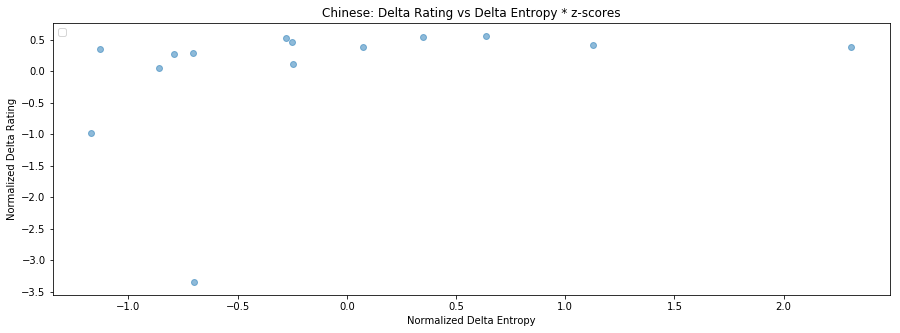

In [190]:
plt.figure(figsize=(15,5))

lang = "chinese"

# For every deltaUpvotes, gets a z-score 
deltaUpvotes = zscore(languageStats[lang][5]) 
deltaE = zscore(languageStats[lang][2]) 

# Keeping lengths consistent
if len(deltaUpvotes) < len(deltaE):
    deltaE = deltaE[:len(deltaUpvotes)]
else: 
    deltaUpvotes = deltaUpvotes[:len(deltaE)]

data = (deltaE, deltaUpvotes)
groups = ("Change in Entropy", "Change in Upvotes")

plt.scatter(deltaE, deltaUpvotes, alpha=0.5)

plt.title('Chinese: Delta Rating vs Delta Entropy * z-scores')
plt.xlabel('Normalized Delta Entropy')
plt.ylabel('Normalized Delta Rating')
plt.legend(loc=2)
plt.show()



In [191]:
import math

def graphLangs(languages):
    plt.figure(figsize=(20,5))
    
    for lang in languages:
        deltaUpvotes = zscore(languageStats[lang][5]) 
        deltaE = zscore(languageStats[lang][2]) 

        # Keeping lengths consistent
        if len(deltaUpvotes) < len(deltaE):
            deltaE = deltaE[:len(deltaUpvotes)]
        else: 
            deltaUpvotes = deltaUpvotes[:len(deltaE)]

        plt.scatter(deltaE, deltaUpvotes, label = lang.title(), s=100)
    # To use log scale: 
    # plt.yscale('log')
    plt.xlabel("Delta Entropy, normalized") ; plt.ylabel("Delta Rating, normalized")
    plt.xticks(size=12) ; plt.yticks(size=12)
    plt.title('Delta Rating vs Delta Entropy, all data')
    plt.legend()
    plt.show

/Users/max/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


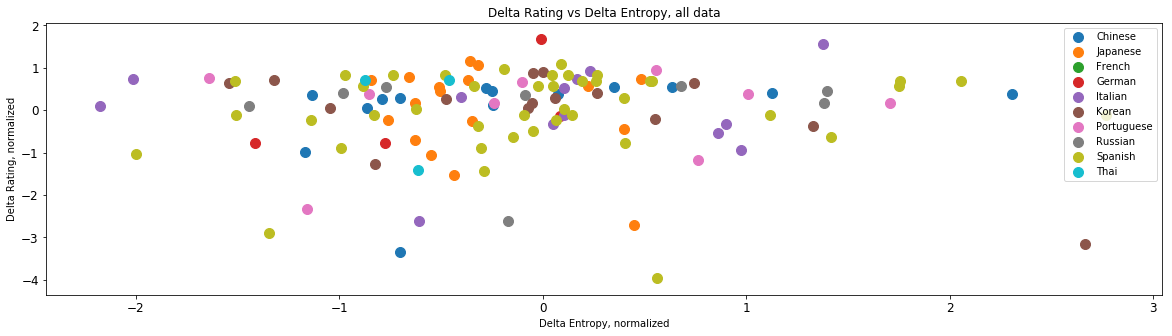

In [192]:
languages1 = ['chinese','japanese','korean','russian','thai']
languages2 = ['french','german','italian','portuguese','spanish']

# graphLangs(languages1)
graphLangs(LANGUAGES)

/Users/max/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.838
Date:                Tue, 29 Oct 2019   Prob (F-statistic):              0.178
Time:                        11:10:03   Log-Likelihood:                -176.44
No. Observations:                 125   AIC:                             356.9
Df Residuals:                     123   BIC:                             362.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.090      0.008      0.9

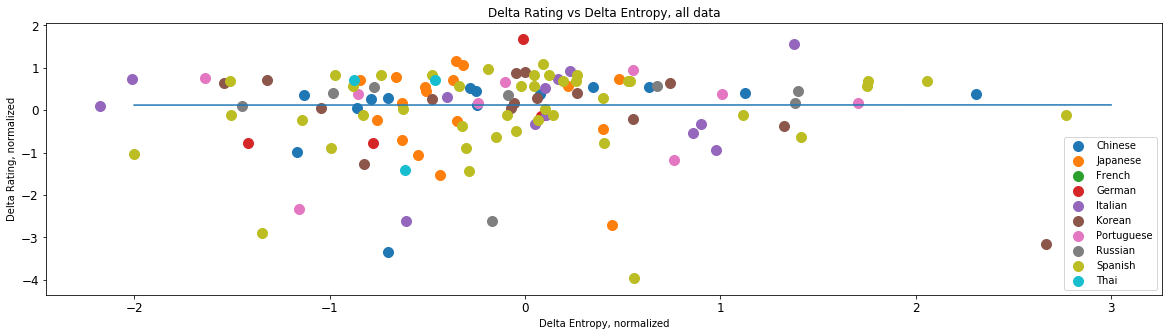

In [193]:
import statsmodels.api as sm

def runRegression(languages, graphName):
    plt.figure(figsize=(20,5))

    ratingVals = []
    entropyVals = []
    
    for lang in languages:
        deltaUpvotes = zscore(languageStats[lang][5]) 
        deltaE = zscore(languageStats[lang][2]) 
        #         deltaE = zscore(map(math.log, languageStats[lang][2])) 
        
        ratingVals.extend(deltaUpvotes)
        entropyVals.extend(deltaE)

        # Keeping lengths consistent
        if len(deltaUpvotes) < len(deltaE):
            deltaE = deltaE[:len(deltaUpvotes)]
        else: 
            deltaUpvotes = deltaUpvotes[:len(deltaE)]

        plt.scatter(deltaE, deltaUpvotes, label = lang.title(), s=100)

    if len(entropyVals) < len(ratingVals):
        ratingVals = ratingVals[:len(entropyVals)]
    else: 
        entropyVals = entropyVals[:len(ratingVals)]
    
    results = sm.OLS(ratingVals,sm.add_constant(entropyVals)).fit()
    print(results.summary())

    X_plot = np.linspace(-2,3,100)
#     X_plot = [i in range(-2, 4, 1)]
    plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
    
    # Plot best-fit
#     b, m = polyfit(entropyVals, ratingVals, 1)
#     plt.plot(entropyVals, b + m * entropyVals, '-')
    
    plt.xlabel("Delta Entropy, normalized") ; plt.ylabel("Delta Rating, normalized")
    plt.xticks(size=12) ; plt.yticks(size=12)
    plt.title(graphName)
    plt.legend()
    plt.show

runRegression(LANGUAGES, 'Delta Rating vs Delta Entropy, all data')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.518
Date:                Tue, 29 Oct 2019   Prob (F-statistic):              0.223
Time:                        11:10:04   Log-Likelihood:                -80.104
No. Observations:                  57   AIC:                             164.2
Df Residuals:                      55   BIC:                             168.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0031      0.133     -0.023      0.9

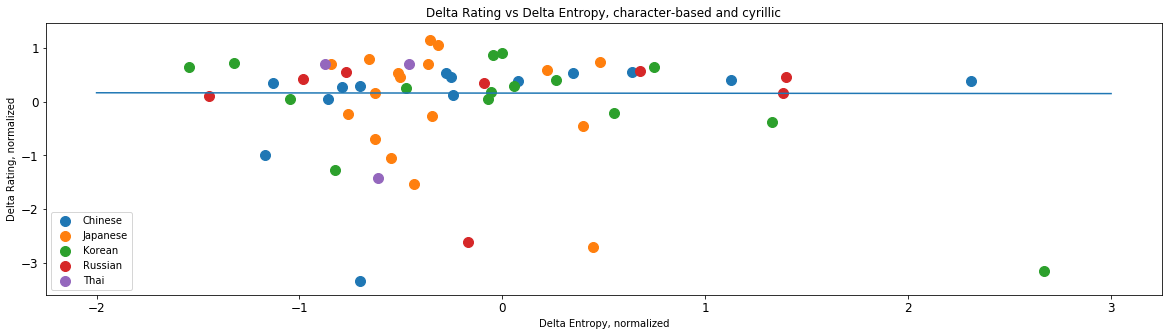

In [194]:
runRegression(languages1, 'Delta Rating vs Delta Entropy, character-based and cyrillic')

/Users/max/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/max/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.2007
Date:                Tue, 29 Oct 2019   Prob (F-statistic):              0.656
Time:                        11:10:04   Log-Likelihood:                -96.385
No. Observations:                  68   AIC:                             196.8
Df Residuals:                      66   BIC:                             201.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.123      0.035      0.9

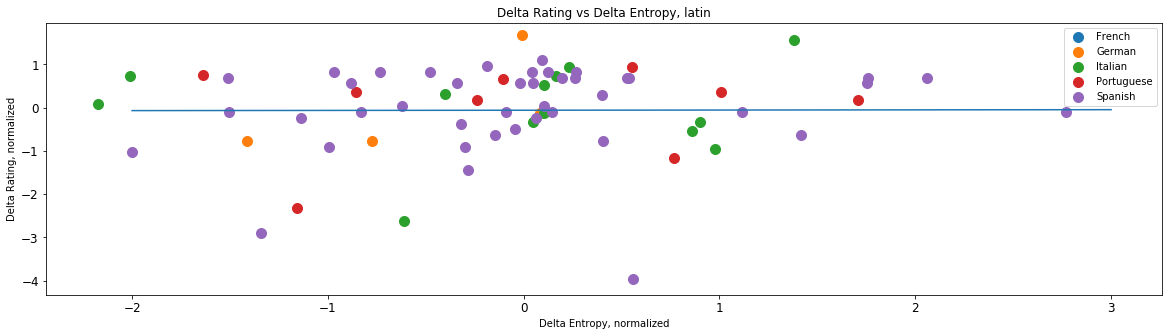

In [195]:
runRegression(languages2, 'Delta Rating vs Delta Entropy, latin')

In [196]:
y1_values = [100, 50, 75, 40, 80]

plt.plot(x_values, y1_values)

# use the same x-values but different y-values
y2_values = [10, 75, 25, 80, 40]

plt.plot(x_values, y2_values )

plt.legend(['line 1','line 2'])
plt.show()

NameError: name 'x_values' is not defined